# Template Matching

Template matching is a technique used in computer vision to find a smaller image (template) within a larger image. It involves sliding the template image over the source image and calculating a similarity measure at each location. This technique is widely used in various image processing applications, such as object detection, feature matching, and tracking.

## Steps Involved in Template Matching:
1. **Grayscale Conversion**: The images are converted into a single channel (grayscale) for simplicity, as most matching algorithms work efficiently with grayscale images.
2. **Template Matching**: We perform template matching using different similarity metrics, like:
   - **Normalized Cross-Correlation (cv2.TM_CCORR_NORMED)**: A similarity measure that highlights locations where the template matches well with the source image.
   - **Squared Difference (cv2.TM_SQDIFF)**: This measure minimizes the difference between the template and the image, providing a lower value for better matches.

3. **Finding the Best Match**: Once the similarity map is generated, we use the `cv2.minMaxLoc()` function to find the location where the template best matches the image.
   - For **Normalized Cross-Correlation (cv2.TM_CCORR_NORMED)**, the highest value indicates the best match.
   - For **Squared Difference (cv2.TM_SQDIFF)**, the lowest value indicates the best match.

## Key Methods and Functions Used:
1. **`cv2.imread()`**: Reads the image file into a numpy array. Images are typically loaded in BGR format.
2. **`cv2.cvtColor()`**: Converts images between different color spaces, like BGR to RGB or grayscale (BGR to GRAY).
3. **`cv2.matchTemplate()`**: Slides the template over the source image and computes a similarity map using a specific method. Common methods include:
   - `cv2.TM_SQDIFF`: The sum of squared differences. The best match is the **minimum** value.
   - `cv2.TM_CCORR_NORMED`: Normalized cross-correlation. The best match is the **maximum** value.

4. **`cv2.minMaxLoc()`**: Finds the minimum and maximum values and their locations in the similarity map.

5. **`cv2.rectangle()`**: Draws a rectangle around the detected object in the image.

6. **`plt.imshow()`**: Displays the image using Matplotlib. We use it to visualize both the grayscale images and the template matching results.

## Parameters for Template Matching:
- **Template Image**: A smaller image that represents the object or feature we are searching for in the source image. In this exercise, we use images of a crocodile and an orange bucket as templates.
- **Source Image**: The larger image where we try to locate the template. In this case, it's an image of a playtable.
- **Similarity Measure**: The algorithm or metric that determines how well the template matches the source image at each location. This exercise explores both `cv2.TM_CCORR_NORMED` and `cv2.TM_SQDIFF`.

### Advantages and Use Cases of Different Similarity Measures:
1. **Normalized Cross-Correlation (`cv2.TM_CCORR_NORMED`)**: This is often a preferred method because it normalizes the result and is less sensitive to changes in lighting or image intensity. It gives a **high value** for a good match.
   - *Use Case*: When you expect that the brightness and contrast of the image may vary but the template remains similar in shape or texture.

2. **Squared Difference (`cv2.TM_SQDIFF`)**: This method is sensitive to differences between the template and the source image. A good match will have a **low value**. However, this metric can be more sensitive to noise.
   - *Use Case*: When you need exact matching and there is little variation between the template and source image.

## Example Workflow:
1. **Loading Images**: We load the playtable image (`playtable_left.png`) and templates (`crocodile.png` and `orange_bucket.png`).
2. **Grayscale Conversion**: Convert both the source image and the templates to grayscale.
3. **Template Matching**: Use `cv2.matchTemplate()` to apply the chosen similarity metric (e.g., `cv2.TM_CCORR_NORMED` or `cv2.TM_SQDIFF`).
4. **Locate the Best Match**: Use `cv2.minMaxLoc()` to find the top-left corner of the matched area.
5. **Drawing a Rectangle**: Draw a rectangle around the detected object using `cv2.rectangle()`.
6. **Comparison of Results**: Compare the results of different similarity metrics by displaying them side by side.

## Exercises Covered:
### **Exercise 1.1**:
- Use normalized cross-correlation to locate the crocodile in the playtable image. The goal is to understand how this metric works and visualize the matching process.

### **Exercise 1.2**:
- Apply template matching to locate an orange bucket in the playtable image using the same method. This exercise reinforces the application of template matching for different objects.

### **Exercise 1.3**:
- Compare the performance of `cv2.TM_CCORR_NORMED` (Normalized Cross-Correlation) and `cv2.TM_SQDIFF` (Squared Difference) by plotting their results side by side. This comparison highlights the difference in behavior between these two metrics.

By the end of this exercise, you should have a solid understanding of template matching techniques, how to apply them using OpenCV, and how to evaluate different similarity metrics.


In [2]:
import cv2
from matplotlib import pyplot as plt

plt.gray()

<Figure size 640x480 with 0 Axes>

The goal of template matching is to find the location of a template image in a larger image. Thus to perform template matching, or block matching, we initially need an image containing some feature (e.g. an object) to locate.
For this exercise we will be using one of the images of a playtable and for simplicity we will be focusing on single channel images (grayscale images).

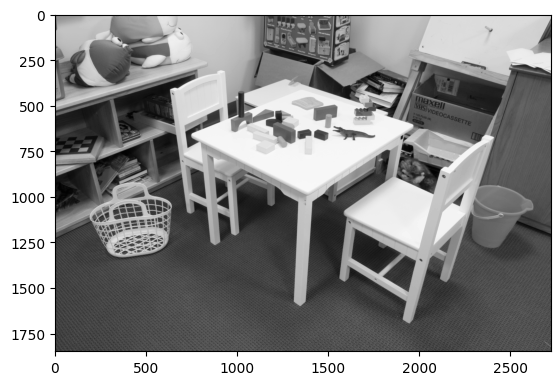

In [3]:
img = cv2.imread("playtable_left.png")

img_left = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_left)


The second thing we need is a template containing the features or object that we are interested in locating.

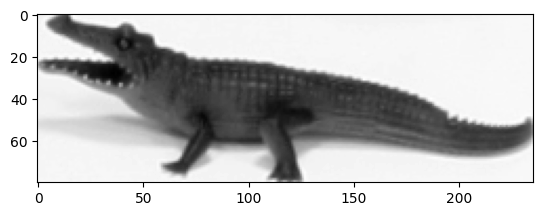

In [4]:
template = cv2.imread('crocodile.png')
# Though the template is saved as a single channel (grayscale) image, it is loaded as a 3 channel image with identical channels.
# Therefore we can just take any of the three channels
template = template[...,0] # or template = template[...,1] or template = template[...,2]
plt.imshow(template)

With both an image and a template, we can perform template matching to locate the crocodile in the large playtable image.

## Exercise 1.1
We will use a normalized cross correlation as a similarity metric defined [here](https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d).

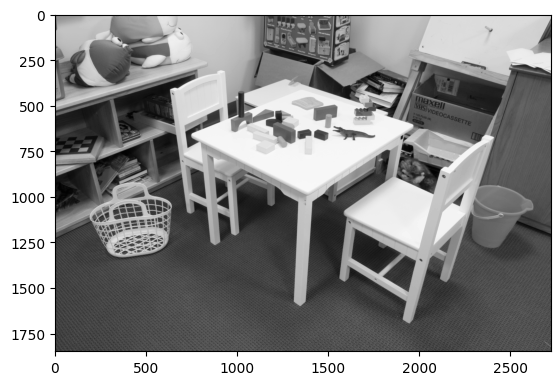

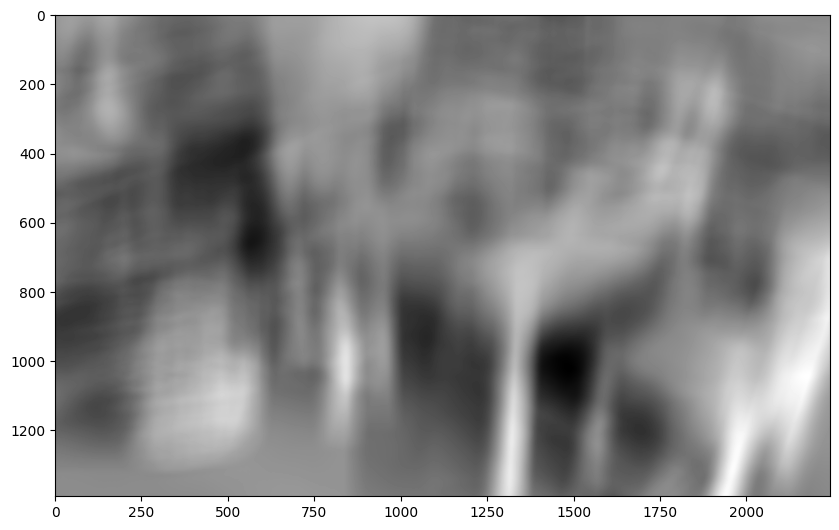

In [13]:
res = cv2.matchTemplate(gray_left, template, cv2.TM_CCORR_NORMED)
plt.figure(figsize = (10,10))
plt.imshow(res, 'gray')

What does the above image tell us?

We can use the minMaxLoc() function to find the location which best matches our template and draw a rectangle around it. 

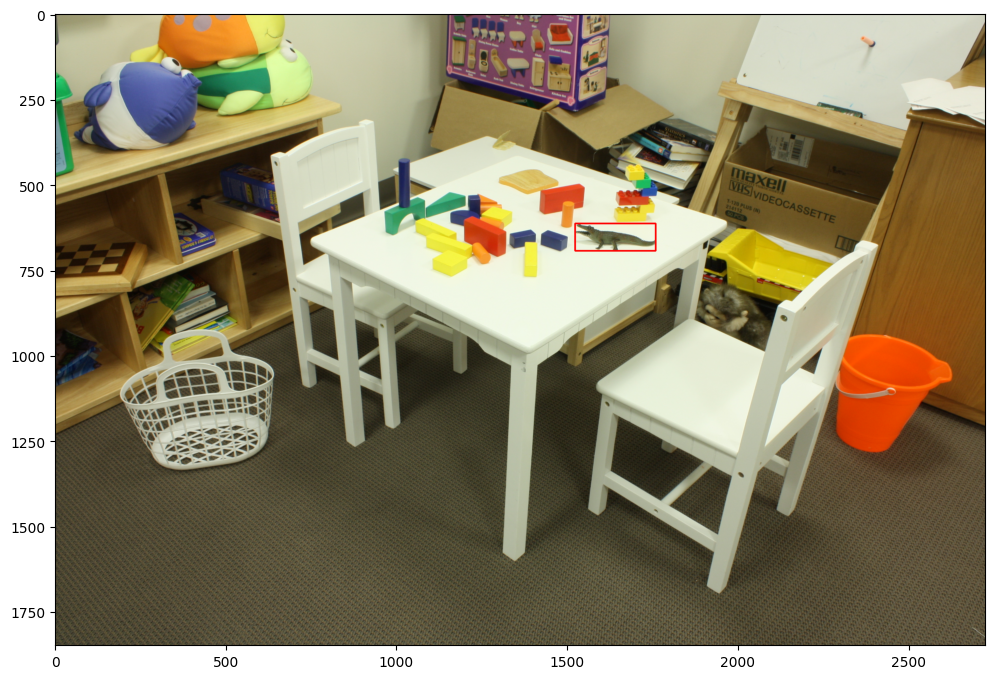

In [6]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

crocodile = cv2.rectangle(img_left.copy(), top_left, bottom_right, (255,0,0), 3)

plt.figure(figsize=(12,12))
plt.imshow(crocodile)


## Exercise 1.2
Use template matching to locate the orange bucket in the center-right side of `playtable_left.png`

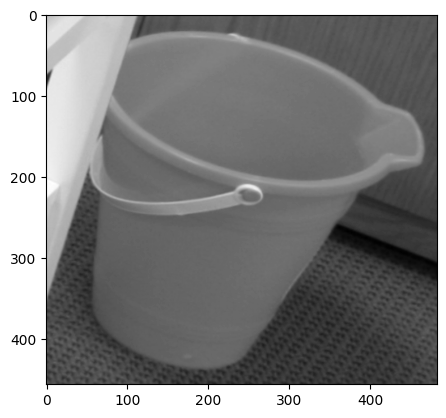

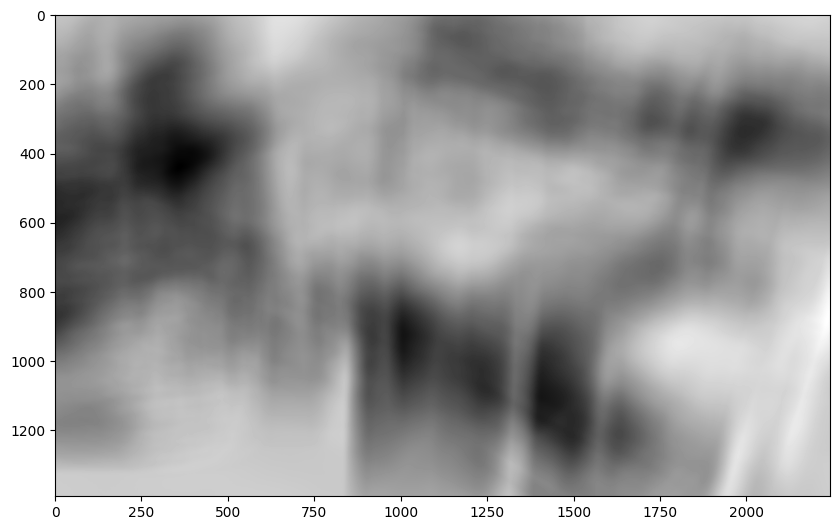

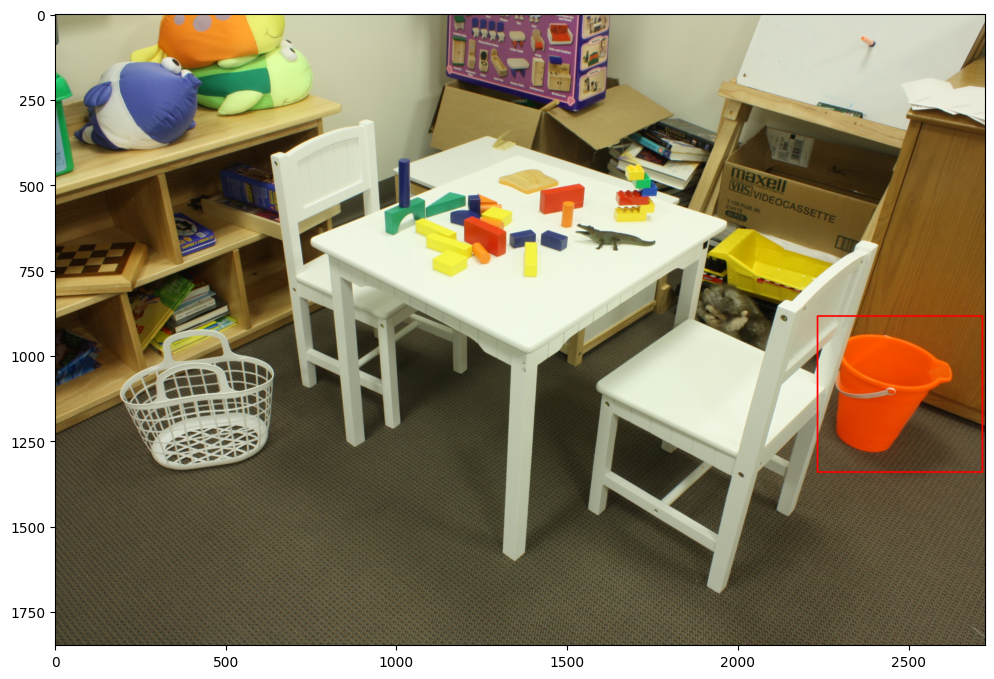

In [15]:
img = cv2.imread("playtable_left.png")

img_left = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_left)

# Now find the orange bucket
template = cv2.imread('orange_bucket.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) # Convert to grayscale
plt.imshow(template)

# Apply template Matching
res = cv2.matchTemplate(gray_left, template, cv2.TM_CCORR_NORMED)
plt.figure(figsize = (10,10))
plt.imshow(res, 'gray')

# Find the maximum value in the result
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
orange_bucket = cv2.rectangle(img_left.copy(), top_left, bottom_right, (255,0,0), 3)

# Display the result
plt.figure(figsize=(12,12))
plt.imshow(orange_bucket)
plt.show()

## Exercise 1.3
In the above examples, we used normalized cross correlation as the metric to create our similarity map. You can find the mathematical description [here](https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d). In the same link you will also find other similarity metrics.

Try to use the squared difference `cv2.TM_SQDIFF` instead and compare it to the above result.

**Hint:** plot the results next to each other.

**NOTE:** Based on the definitions in the above link, we see that `cv2.TM_SQDIFF` gives a low value for a good match, i.e. we have to look for the lowest value in the similarity map instead of the maximum value like we did with `cv2.TM_CCORR_NORMED`.

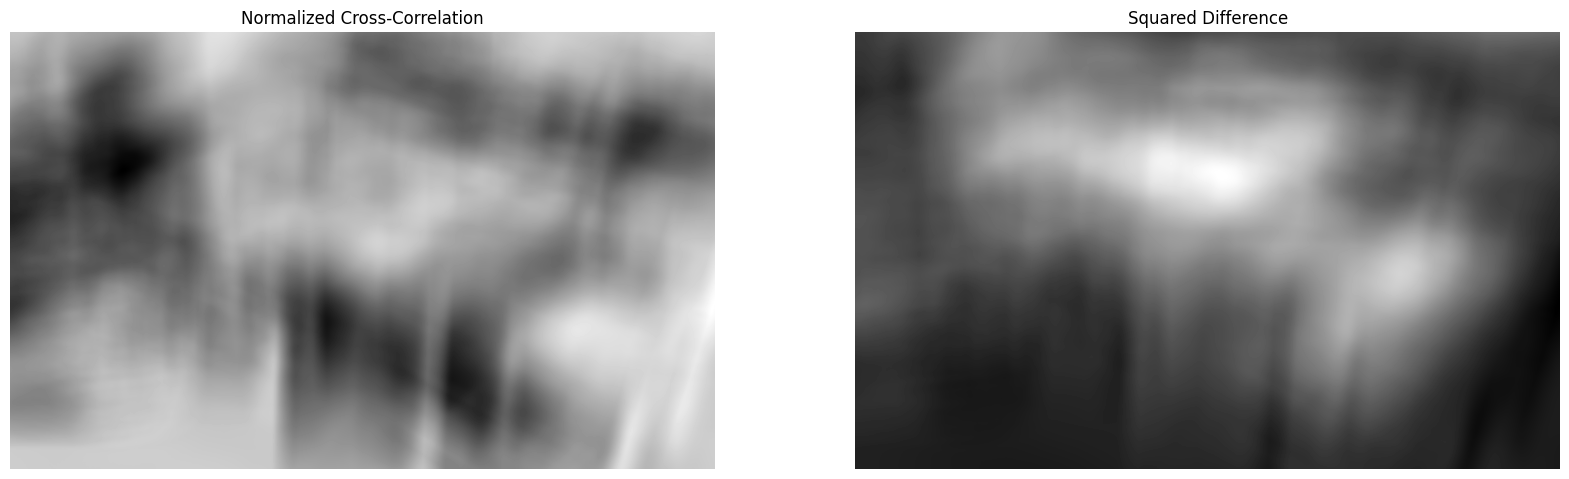

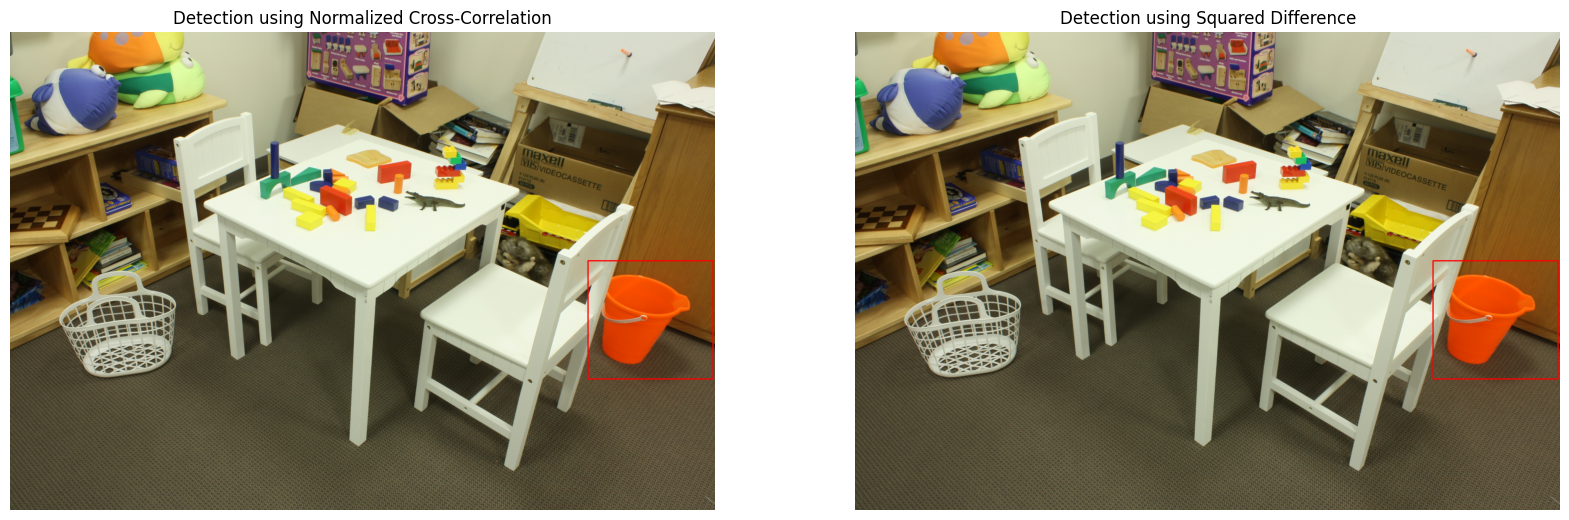

In [16]:
# Apply template Matching using cv2.TM_CCORR_NORMED
res_ccorr_normed = cv2.matchTemplate(gray_left, template, cv2.TM_CCORR_NORMED)

# Apply template Matching using cv2.TM_SQDIFF
res_sqdiff = cv2.matchTemplate(gray_left, template, cv2.TM_SQDIFF)

# Plot both similarity maps side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('Normalized Cross-Correlation')
plt.imshow(res_ccorr_normed, 'gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Squared Difference')
plt.imshow(res_sqdiff, 'gray')
plt.axis('off')

plt.show()

# Find the best match location for cv2.TM_CCORR_NORMED (maximum value)
min_val_ccorr, max_val_ccorr, min_loc_ccorr, max_loc_ccorr = cv2.minMaxLoc(res_ccorr_normed)
top_left_ccorr = max_loc_ccorr
bottom_right_ccorr = (top_left_ccorr[0] + template.shape[1], top_left_ccorr[1] + template.shape[0])

# Draw rectangle on the image for cv2.TM_CCORR_NORMED
detected_img_ccorr = cv2.rectangle(img_left.copy(), top_left_ccorr, bottom_right_ccorr, (255, 0, 0), 3)

# Find the best match location for cv2.TM_SQDIFF (minimum value)
min_val_sqdiff, max_val_sqdiff, min_loc_sqdiff, max_loc_sqdiff = cv2.minMaxLoc(res_sqdiff)
top_left_sqdiff = min_loc_sqdiff
bottom_right_sqdiff = (top_left_sqdiff[0] + template.shape[1], top_left_sqdiff[1] + template.shape[0])

# Draw rectangle on the image for cv2.TM_SQDIFF
detected_img_sqdiff = cv2.rectangle(img_left.copy(), top_left_sqdiff, bottom_right_sqdiff, (255, 0, 0), 3)

# Plot the detection results side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('Detection using Normalized Cross-Correlation')
plt.imshow(detected_img_ccorr)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detection using Squared Difference')
plt.imshow(detected_img_sqdiff)
plt.axis('off')

plt.show()
